In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import gc
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Train.csv')
train_df

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.003030,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.002150,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.009235,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699


In [3]:
test_df = pd.read_csv('Test.csv')
test_df

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.000000,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.000000,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.000000,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.000000,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.000000,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,19100107: Ward 107,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,...,0.000392,0.000291,0.000148,0.002277,0.0,0.0,ZA1910107,-33.806524,18.496094,33.913055
1009,19100108: Ward 108,17470.24004,53538.12816,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,...,0.030744,0.008313,0.000348,0.022417,0.0,0.0,ZA1910108,-33.982120,18.673308,60.009486
1010,19100109: Ward 109,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,...,0.003850,0.000990,0.000352,0.010670,0.0,0.0,ZA1910109,-34.062704,18.767457,35.834860
1011,19100110: Ward 110,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,...,0.000559,0.000000,0.000204,0.026741,0.0,0.0,ZA1910110,-34.057772,18.487893,50.153301


In [16]:
import geopandas as gpd

gdf = gpd.read_file('zaf_adm_sadb_ocha_20201109_SHP/zaf_admbnda_adm4_sadb_ocha_20201109.shp')
gdf

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,...,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,ADM1_ID,ADM2_ID,ADM3_ID,geometry
0,0.253589,0.001676,001,ZA9344001,None,None,None,Makhado,ZA9344,Vhembe,...,ZA9,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,LIM,DC34,LIM344,"POLYGON ((30.08822 -23.17143, 30.08864 -23.171..."
1,0.159002,0.000912,002,ZA9344002,None,None,None,Makhado,ZA9344,Vhembe,...,ZA9,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,LIM,DC34,LIM344,"POLYGON ((30.06417 -23.14931, 30.06423 -23.149..."
2,0.374324,0.003885,003,ZA9344003,None,None,None,Makhado,ZA9344,Vhembe,...,ZA9,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,LIM,DC34,LIM344,"POLYGON ((30.34666 -23.05667, 30.34681 -23.056..."
3,0.206612,0.001345,004,ZA9344004,None,None,None,Makhado,ZA9344,Vhembe,...,ZA9,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,LIM,DC34,LIM344,"POLYGON ((30.40711 -23.08805, 30.40968 -23.093..."
4,0.581000,0.009428,005,ZA9344005,None,None,None,Makhado,ZA9344,Vhembe,...,ZA9,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,LIM,DC34,LIM344,"POLYGON ((30.05989 -23.17453, 30.05992 -23.174..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.168897,0.001549,046,ZA4940046,None,None,None,Mangaung,ZA4940,Mangaung,...,ZA4,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,FS,MAN,MAN,"POLYGON ((26.30095 -29.174, 26.30303 -29.17506..."
4388,0.666631,0.008428,047,ZA4940047,None,None,None,Mangaung,ZA4940,Mangaung,...,ZA4,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,FS,MAN,MAN,"POLYGON ((26.32859 -29.02974, 26.32861 -29.029..."
4389,1.729521,0.086915,048,ZA4940048,None,None,None,Mangaung,ZA4940,Mangaung,...,ZA4,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,FS,MAN,MAN,"POLYGON ((25.80315 -28.89374, 25.80395 -28.893..."
4390,0.168791,0.001157,049,ZA4940049,None,None,None,Mangaung,ZA4940,Mangaung,...,ZA4,South Africa,ZA,2018-12-27,2020-11-09,0000/00/00,FS,MAN,MAN,"POLYGON ((26.83511 -29.16999, 26.84214 -29.170..."


# Preprocess

In [4]:
train_df.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [5]:
rm_cols = ['car_01', 'stv_01', 'lln_01']

In [6]:
train_df['household_size'] = train_df['total_individuals'] / train_df['total_households']
test_df['household_size'] = test_df['total_individuals'] / test_df['total_households']

train_df.drop(columns=rm_cols, inplace=True)
test_df.drop(columns=rm_cols, inplace=True)

In [7]:
train_df.iloc[:, 60:70].isna().sum()

household_size    0
dtype: int64

# Training

In [8]:
x = train_df.drop(columns=['target', 'ADM4_PCODE', 'ward'])
y = train_df['target']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=117)

In [116]:
from catboost import CatBoostRegressor, Pool

cb_params = {
    'iterations': 20000,
    'learning_rate': 1e-2,
    'loss_function': 'RMSE',
    # 'eval_metric': 'AUC',
    'depth': 4,
    'l2_leaf_reg': 8,
    # 'bagging_temperature': 3,
    # 'random_strength': 0.005,
    'border_count': 256,
    # 'od_type': 'IncToDec',
    'verbose': 200,
    # 'subsample': 1.0,
    # 'random_seed': 42,
    'early_stopping_rounds': 2000,
    'task_type': 'CPU',
}

In [117]:
cat_features = []

In [118]:
train_pool = Pool(x_train, y_train, cat_features=cat_features)
valid_pool = Pool(x_valid, y_valid, cat_features=cat_features)

In [119]:
cb_model = CatBoostRegressor(**cb_params)

cb_model.fit(train_pool, eval_set=[train_pool, valid_pool], use_best_model=True)

0:	learn: 10.1922155	test: 10.1922155	test1: 10.3362790	best: 10.3362790 (0)	total: 4.62ms	remaining: 1m 32s
200:	learn: 4.5150134	test: 4.5150134	test1: 4.5373677	best: 4.5373677 (200)	total: 354ms	remaining: 34.9s
400:	learn: 3.7165114	test: 3.7165114	test1: 3.7680053	best: 3.7680053 (400)	total: 500ms	remaining: 24.4s
600:	learn: 3.4758490	test: 3.4758490	test1: 3.5598960	best: 3.5598960 (600)	total: 686ms	remaining: 22.1s
800:	learn: 3.3415701	test: 3.3415701	test1: 3.4718463	best: 3.4718463 (800)	total: 938ms	remaining: 22.5s
1000:	learn: 3.2478649	test: 3.2478649	test1: 3.4190352	best: 3.4190352 (1000)	total: 1.09s	remaining: 20.7s
1200:	learn: 3.1329079	test: 3.1329079	test1: 3.3537645	best: 3.3537645 (1200)	total: 1.25s	remaining: 19.5s
1400:	learn: 3.0097290	test: 3.0097290	test1: 3.2877158	best: 3.2877158 (1400)	total: 1.39s	remaining: 18.5s
1600:	learn: 2.8916188	test: 2.8916188	test1: 3.2295625	best: 3.2295625 (1600)	total: 1.54s	remaining: 17.7s
1800:	learn: 2.7819968	test

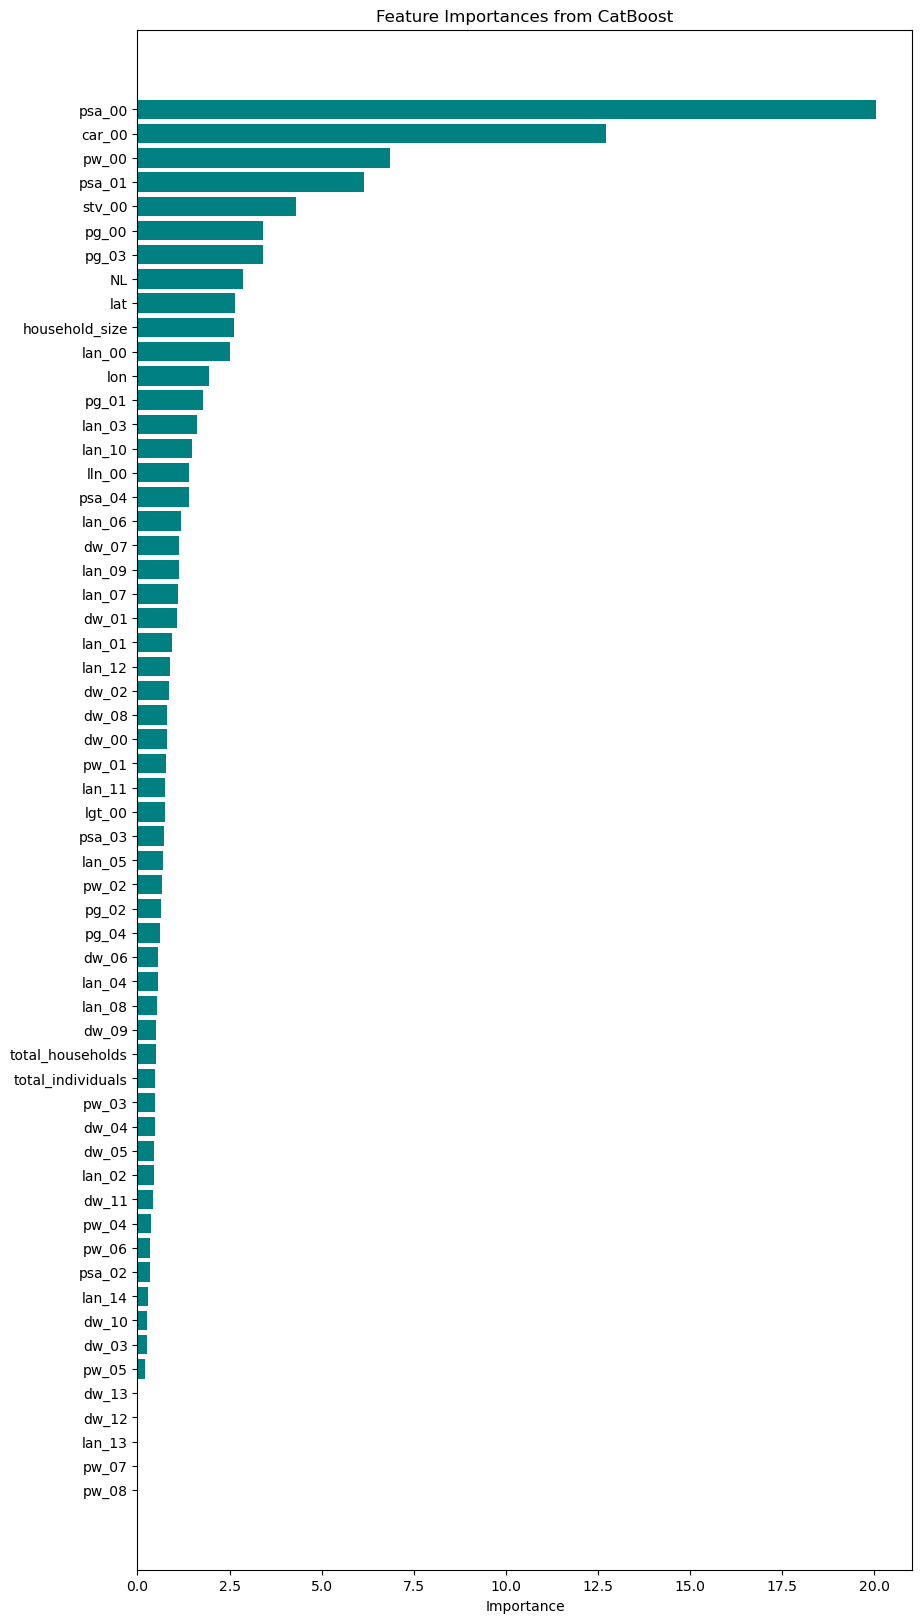

In [120]:
feature_importances = cb_model.get_feature_importance()

feature_names = x_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances from CatBoost')
plt.show()

# LGBM

In [125]:
import lightgbm as lgb

train_data = lgb.Dataset(x_train, label=y_train)
valid_data = lgb.Dataset(x_valid, label=y_valid, reference=train_data)

In [141]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 1e-2,
    "num_leaves": 31,
    "max_depth": 1,
    # "min_data_in_leaf": 20,
    "verbose": -1,
    'num_boost_round': 10000,
}

In [142]:
# Train the model
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.log_evaluation(200)]
)

[200]	training's rmse: 5.64124	valid_1's rmse: 5.61366
[400]	training's rmse: 4.54645	valid_1's rmse: 4.47727
[600]	training's rmse: 4.17327	valid_1's rmse: 4.12627
[800]	training's rmse: 3.98658	valid_1's rmse: 3.96678
[1000]	training's rmse: 3.85878	valid_1's rmse: 3.85766
[1200]	training's rmse: 3.76633	valid_1's rmse: 3.77999
[1400]	training's rmse: 3.69766	valid_1's rmse: 3.727
[1600]	training's rmse: 3.64446	valid_1's rmse: 3.68583
[1800]	training's rmse: 3.60096	valid_1's rmse: 3.65046
[2000]	training's rmse: 3.56416	valid_1's rmse: 3.62189
[2200]	training's rmse: 3.53223	valid_1's rmse: 3.59724
[2400]	training's rmse: 3.50417	valid_1's rmse: 3.57572
[2600]	training's rmse: 3.47928	valid_1's rmse: 3.55686
[2800]	training's rmse: 3.4567	valid_1's rmse: 3.5406
[3000]	training's rmse: 3.43594	valid_1's rmse: 3.52712
[3200]	training's rmse: 3.41656	valid_1's rmse: 3.51512
[3400]	training's rmse: 3.39831	valid_1's rmse: 3.50468
[3600]	training's rmse: 3.38103	valid_1's rmse: 3.49513


# AutoGluon

In [ ]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='target', problem_type='regression', eval_metric='mean_squared_error')

predictor.fit(
    train_df,
    presets='best_quality',
    time_limit=20*60,
    auto_stack=True,
    #num_bag_folds=5,
    #num_bag_sets=2,
    num_stack_levels=2,
    dynamic_stacking=True,
    # excluded_model_types=['KNN', 'FASTAI', 'NN_TORCH', 'EXTRATREES'],
)

In [10]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-8.616650,mean_squared_error,5.268513,376.494946,0.006199,0.292666,2,True,19
1,CatBoost_BAG_L1,-9.413365,mean_squared_error,0.031338,218.444948,0.031338,218.444948,1,True,6
2,LightGBM_r96_BAG_L1,-9.444153,mean_squared_error,4.253430,15.619184,4.253430,15.619184,1,True,17
3,LightGBMXT_BAG_L1,-9.459190,mean_squared_error,0.535151,10.340604,0.535151,10.340604,1,True,3
4,CatBoost_r177_BAG_L1,-9.611281,mean_squared_error,0.030656,80.041973,0.030656,80.041973,1,True,12
5,LightGBM_r131_BAG_L1,-9.819873,mean_squared_error,3.437083,59.403158,3.437083,59.403158,1,True,14
6,LightGBM_BAG_L1,-9.953962,mean_squared_error,0.390943,17.565812,0.390943,17.565812,1,True,4
7,CatBoost_r9_BAG_L1,-9.969653,mean_squared_error,0.115787,235.648790,0.115787,235.648790,1,True,16
8,XGBoost_BAG_L1,-10.734199,mean_squared_error,0.116843,29.497626,0.116843,29.497626,1,True,9
9,NeuralNetTorch_r79_BAG_L1,-10.849951,mean_squared_error,0.262922,28.248522,0.262922,28.248522,1,True,13


In [12]:
np.sqrt(8.61)

2.9342801502242417

# Inference

In [121]:
test_preds = cb_model.predict(test_df.drop(columns=['ward', 'ADM4_PCODE']))
test_preds

array([19.04659081, 12.83010604, 19.92338145, ..., 18.74176028,
       15.43593879, 19.0771338 ])

In [122]:
sub_df = pd.DataFrame({
    'ward': test_df['ward'],
    'target': test_preds,
})
sub_df

,ward,target
0,21001001: Ward 1,19.046591
1,21001002: Ward 2,12.830106
2,21001003: Ward 3,19.923381
3,21001004: Ward 4,17.847862
4,21001005: Ward 5,21.220170
...,...,...
1008,19100107: Ward 107,6.343578
1009,19100108: Ward 108,22.465400
1010,19100109: Ward 109,18.741760
1011,19100110: Ward 110,15.435939


In [123]:
sub_df.to_csv('submission.csv', index=False)